In [1]:
import sem_expo
import poisson_hypergraph
import xgi
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [69]:
thetas = [[0.9, 0.1, 0.75, 0.25, 0.75, 0.25],
          [0.6, 0.4, 0.75, 0.25, 0.75, 0.25],
          [0.1, 0.9, 0.9, 0.1, 0.9, 0.1],
          [0.6, 0.4, 0.9, 0.1, 0.9, 0.1]]
centers_list = []
heights_list = []
size_counts_list = []
for theta in thetas:
    func = sem_expo.sem_functions()
    gh_size = 100000
    GH = func.generate_hypergraph(theta, gh_size)
    H = xgi.Hypergraph(GH.edge_members)
    centers, heights = xgi.degree_histogram(H)
    centers_list.append(centers)
    heights_list.append(heights)
    list_of_edges_sizes = H.edges.size.aslist()
    size_counts = dict(Counter(list_of_edges_sizes))
    size_counts_list.append(size_counts)

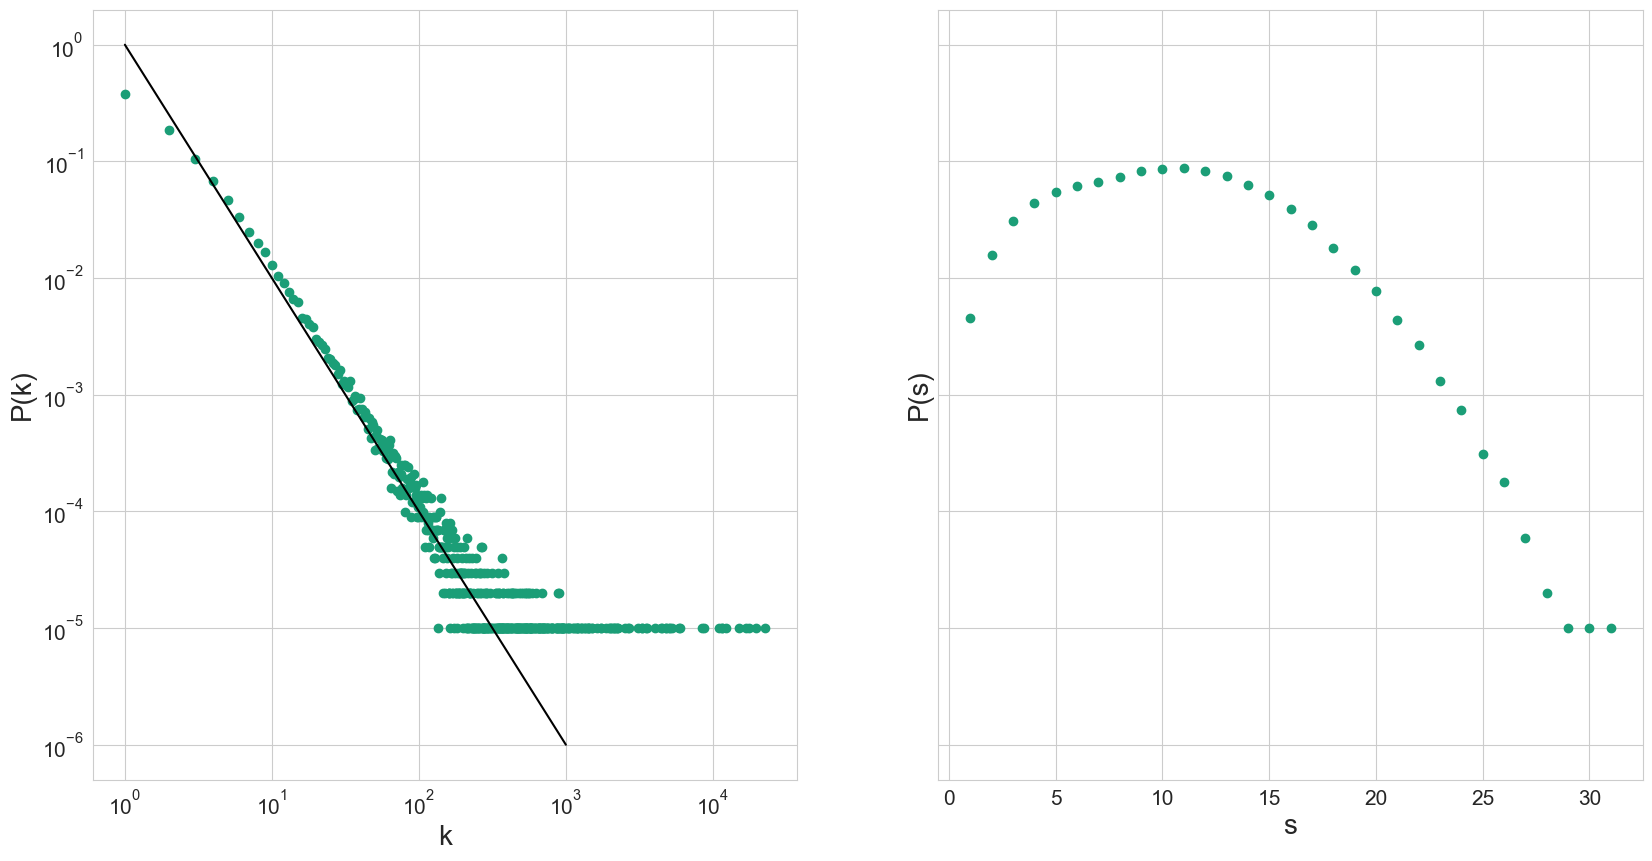

In [91]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)
axs[0].scatter(centers_list[0], np.array(heights_list[0]) / len(H.nodes))
axs[0].plot(range(1, 10**3), [x ** (-2) for x in range(1, 10**3)], c = "black")
axs[0].set_ylabel("P(k)")
axs[0].set_xlabel("k")
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].scatter(list(size_counts_list[0].keys()), np.array(list(size_counts_list[0].values())) / len(H.nodes))
axs[1].set_ylabel("P(s)")
axs[1].set_xlabel("s")
axs[1].set_yscale('log')


plt.savefig('degree_and_edge_distribution_fig_g1.png', dpi=300, bbox_inches="tight")

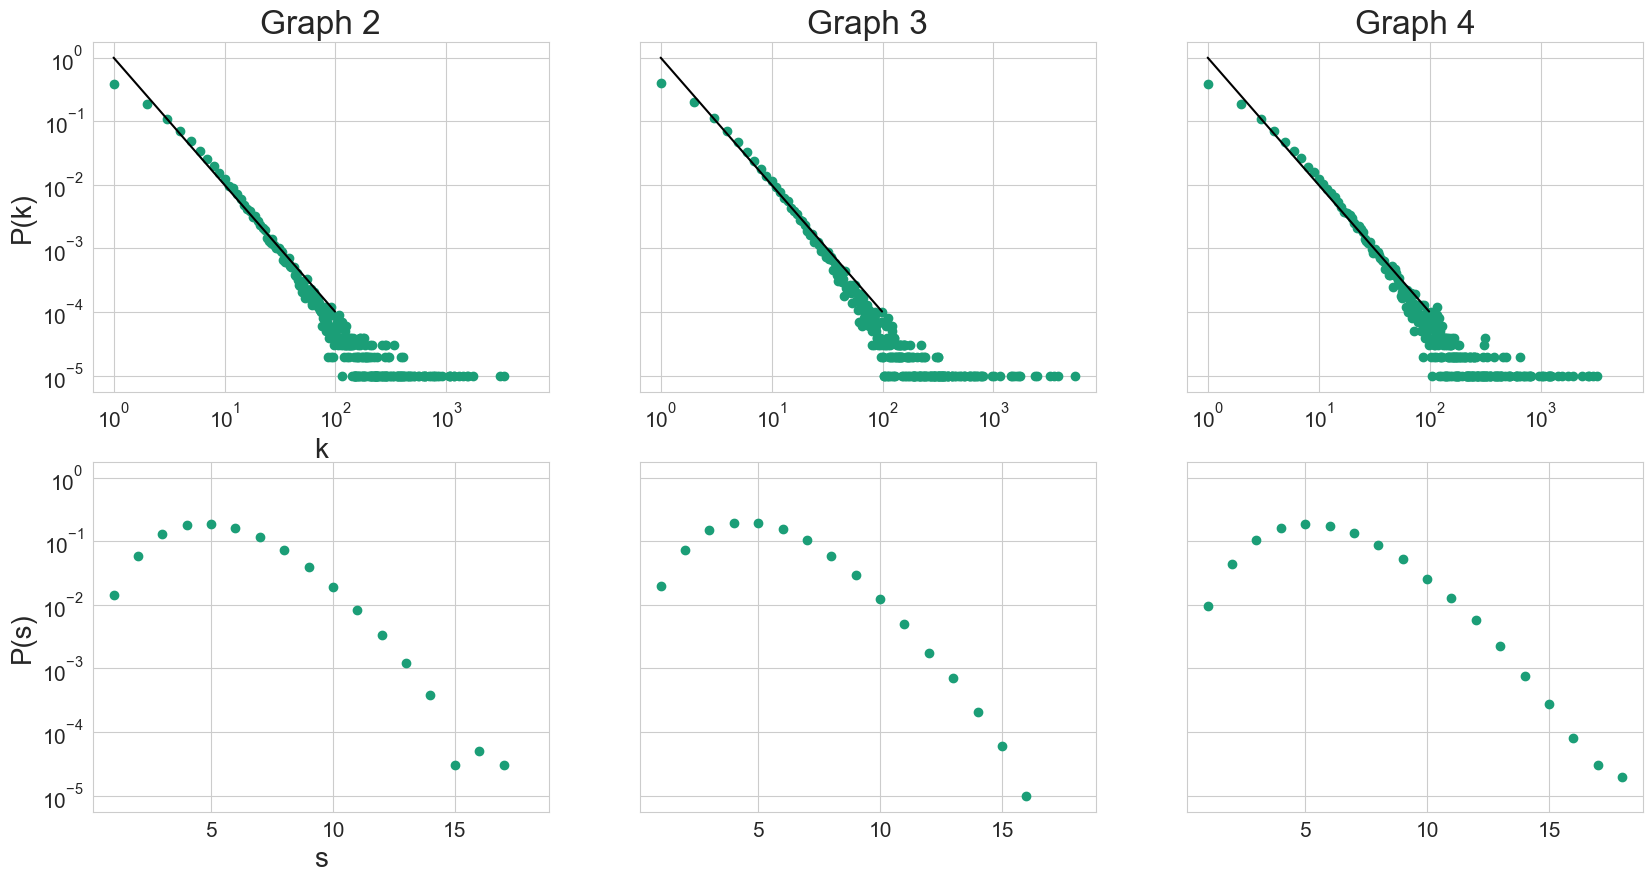

In [93]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, axs = plt.subplots(2, 3, sharey=True, sharex = 'row')
fig.set_figwidth(20)
fig.set_figheight(10)

axs[0,0].set_title("Graph 2")
axs[0,0].scatter(centers_list[1], np.array(heights_list[1]) / len(H.nodes))
axs[0,0].plot(range(1, 10**2), [x ** (-2) for x in range(1, 10**2)], c = "black")
axs[0,0].set_ylabel("P(k)")
axs[0,0].set_xlabel("k")
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')

axs[1,0].scatter(list(size_counts_list[1].keys()), np.array(list(size_counts_list[1].values())) / len(H.nodes))
axs[1,0].set_ylabel("P(s)")
axs[1,0].set_xlabel("s")
axs[1,0].set_yscale('log')

axs[0,1].set_title("Graph 3")
axs[0,1].scatter(centers_list[2], np.array(heights_list[2]) / len(H.nodes))
axs[0,1].plot(range(1, 10**2), [x ** (-2) for x in range(1, 10**2)], c = "black")

axs[1,1].scatter(list(size_counts_list[2].keys()), np.array(list(size_counts_list[2].values())) / len(H.nodes))

axs[0,2].set_title("Graph 4")
axs[0,2].scatter(centers_list[3], np.array(heights_list[3]) / len(H.nodes))
axs[0,2].plot(range(1, 10**2), [x ** (-2) for x in range(1, 10**2)], c = "black")

axs[1,2].scatter(list(size_counts_list[3].keys()), np.array(list(size_counts_list[3].values())) / len(H.nodes))


plt.savefig('degree_and_edge_distribution_fig_app.png', dpi=300, bbox_inches="tight")